## Estadística Aplicada

Parcial 3

Patricio Ruiz Rodriguez         1897914            Gpo 41

**1. Muestre de que tipo son las variables del dataframe, revise que no haya missing values (de haberlos imputar valores). Cersiorarse que exista una variable fecha, que sea el index y tenga una frecuencia asignada**

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [75]:
metro = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')

In [76]:
metro.head()

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.0,3240.0
1,1995/02,2879.0,3623.0
2,1995/03,3103.0,3990.0
3,1995/04,3491.0,3321.0
4,1995/05,3109.0,3777.0


In [77]:
metro.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [78]:
metro.isnull().sum()

mes                          0
miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

In [79]:
metro['mes']=pd.to_datetime(metro['mes'],format='%Y/%m')

In [80]:
metro = metro.set_index('mes')

In [81]:
metro.head()

,miles de pasajeros,ingresos (miles de pesos)
mes,,
1995-01-01,3439.0,3240.0
1995-02-01,2879.0,3623.0
1995-03-01,3103.0,3990.0
1995-04-01,3491.0,3321.0
1995-05-01,3109.0,3777.0


In [82]:
metro = metro.asfreq('MS')

In [83]:
metro.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq='MS')

**2. Análisis  exploratorio.  Utilizando  código  de  Python  genera  un  print()para  cada una de la siguiente información**

*a) Rango de fechas*

In [84]:
min = metro.index.min()
max = metro.index.max()

In [85]:
print(f'El rango de fechas va de {min} a {max}')

El rango de fechas va de 1995-01-01 00:00:00 a 2023-08-01 00:00:00


*b) Número de observaciones*

In [86]:
obs = metro['miles de pasajeros'].count()

In [87]:
print('El número de observaciones es',obs)

El número de observaciones es 344


*c) Valor mínimo y valor máximo del número de pasajeros*

In [88]:
p_max = metro['miles de pasajeros'].max()
p_min = metro['miles de pasajeros'].min()

In [89]:
print(f'El valor mínimo de pasajeros es {p_min} y el máximo es {p_max}')

El valor mínimo de pasajeros es 2397.0 y el máximo es 17534.523


**3. Grafica lo siguiente**

*a) La serie de miles de pasajeros*

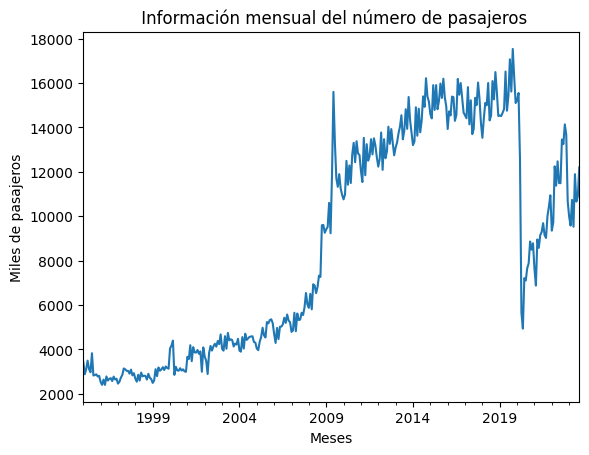

In [90]:
metro['miles de pasajeros'].plot()
plt.title(' Información mensual del número de pasajeros')
plt.xlabel('Meses')
plt.ylabel('Miles de pasajeros')
plt.show();

*b) Una media móvil centradaa 6 meses, y explica si la serie tiene tendencia o no, y si existen ciclos (subidas y caídas) y que se debe cada uno.*

In [121]:
metro['PMS-7'] = metro['miles de pasajeros'].rolling(7,center=True).mean()

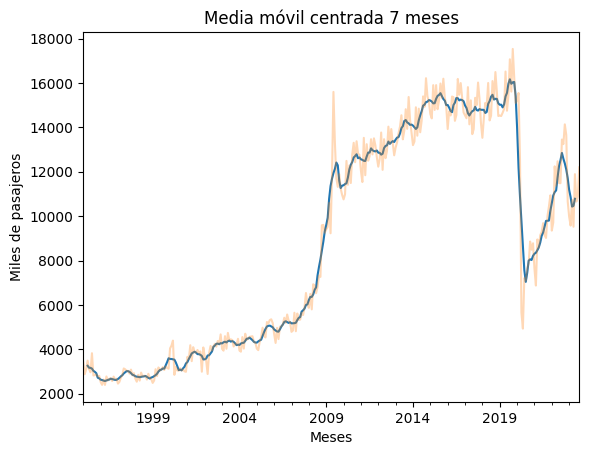

In [123]:
metro['PMS-7'].plot()
metro['miles de pasajeros'].plot(alpha=0.3);
plt.title('Media móvil centrada 7 meses');
plt.xlabel('Meses')
plt.ylabel('Miles de pasajeros')
plt.show();

La serie presenta una tendencia alcista, no se visualiza ningun ciclo per hay una caída evidente en el año 2020 a consecuencia del COVID.

**4. El director  de  Metrorrey  planea  hacer  mantenimiento  a  las  estaciones  y  los vagones,  pero  no  sabe  la  fecha  adecuada  para  hacerlo.  Utiliza  el  modelo  ETS para  obtener  el  componente  estacional  de  la  serie  y  señala  el  mes  o  meses adecuados para dar mantenimiento**

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

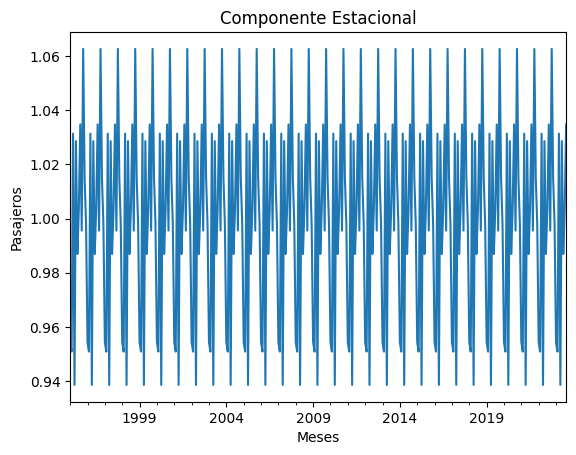

In [94]:
ets = seasonal_decompose(metro['miles de pasajeros'], model='mul')
ets.seasonal.plot()
plt.title('Componente Estacional');
plt.xlabel('Meses')
plt.ylabel('Pasajeros')
plt.show();

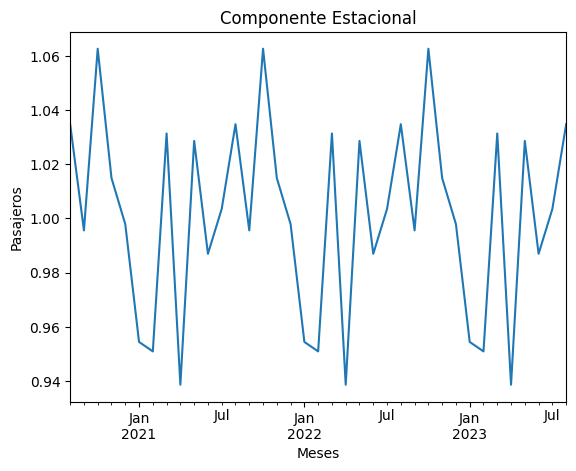

In [95]:
ets = seasonal_decompose(metro['miles de pasajeros'], model='mul')
ets.seasonal.plot()
plt.title('Componente Estacional');
plt.xlabel('Meses')
plt.xlim('2020-08-01','2023-08-01')
plt.ylabel('Pasajeros')
plt.show();

Podemos observar que el mejor mes para realizar mantenimientos seria abril debido a que es el mes con menos pasajeros pero si los mantenimiento requieren de más de un mes, el periodo de diciembre-febrero serie la mejor opción.

**5. El  director  de  Metrorrey  quiere  saber  los  ingresos  por  pasaje  y  el  número  de pasajeros  los  siguientes  5  meses. Utiliza  el  método  de  Holt-Winters  para pronosticar  el  número  de  pasajeros los  próximos  5  meses,  cada  pronóstico multiplícalo por $7.1 para tener un estimado de los ingresos**

In [96]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [97]:
metro['Holt-Winter']=ExponentialSmoothing(metro['miles de pasajeros'], trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

C:\Users\Personal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [98]:
hw=ExponentialSmoothing(metro['miles de pasajeros'],trend='add',seasonal='add',seasonal_periods=12).fit()

C:\Users\Personal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [99]:
pronostico_5meses=hw.forecast(5)

In [100]:
ingresos=pronostico_5meses*7.1

In [101]:
print('Los ingresos estimados de los siguientes 5 meses son:\n',ingresos)

Los ingresos estimados de los siguientes 5 meses son:
 2023-09-01    80772.197193
2023-10-01    85912.765023
2023-11-01    80823.831741
2023-12-01    77135.206982
2024-01-01    76649.574259
Freq: MS, dtype: float64


**6. Realiza   un   pronósticode   los   miles   de   pasajeroscon   el   modelo   ARIMA cumpliendo los siguientes pasos:**

*a) Realiza una prueba de raíz unitaria a la serie original*

In [102]:
prueba_adf = adfuller(metro['miles de pasajeros'].dropna())
pvalue = prueba_adf[1]
pvalue.round(2)

0.58

No rechazamos Ho, la serie es no estacionaria

*b) En caso de que no sea estacionaria aplica primeras diferencias, y realiza la prueba de raíz unitaria para verificar que la serie sea estacionaria*

In [103]:
metro['pasajeros_diff'] = metro['miles de pasajeros'].diff()

In [104]:
prueba_adf1 = adfuller(metro['pasajeros_diff'].dropna())
pvalue = prueba_adf1[1]
pvalue.round(2)

0.0

Rechazamos Ho, las primeras diferencias es una serie estacionaria

*c) Si  la  serie  no  es  estacionaria  repite  el  paso  b  hasta  que  la  serie  sea estacionaria.*

*d) Realiza  las  graficas  de  autocorrelación  de  la  serie  estacionaria  para verificar si la serie tiene o no un componente estacional*

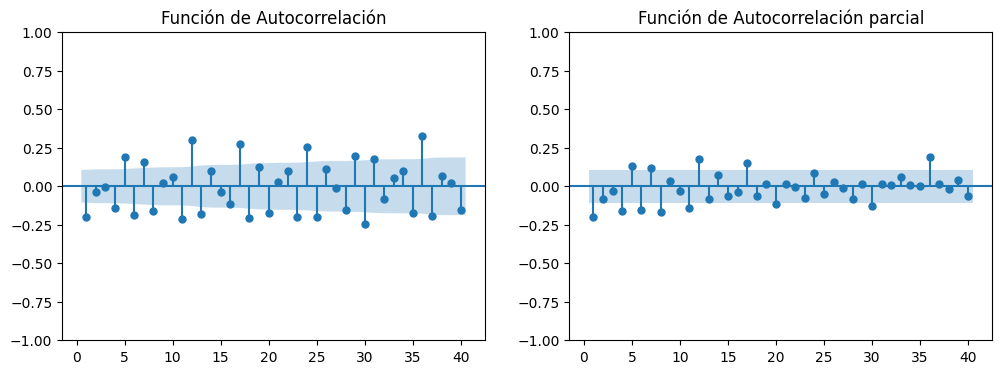

In [105]:
ig, ax=plt.subplots(1,2,figsize=(12,4))
plot_acf(metro['pasajeros_diff'].dropna(),zero=False,lags=40,ax=ax[0],title='Función de Autocorrelación')
ax[0].set_ylim(-1,1)
plot_pacf(metro['pasajeros_diff'].dropna(),zero=False,lags=40,ax=ax[1],title='Función de Autocorrelación parcial')
ax[1].set_ylim(-1,1);

La gráfica indica que la serie tiene un componente estacional (sigue un patrón la gráfica)

*e) Utiliza auto_arimapara encontrar el orden del modelo arima, dando el parámetro information_criterionprueba y muestra el resultado, con aic, bic, hqic, oob, en caso de que resulten diferente elegir aic si tu matricula termina en par, sino termina en par elegir uno distinto a aic.*

In [106]:
pm.auto_arima(metro['miles de pasajeros'].dropna(),   
              start_p=1, max_p=7,
              start_q=1,max_q=7,
              ic='AIC',
              seasonal=True,
              m=12,
              start_P=1,start_Q=1,
              max_P=7,max_Q=7)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [107]:
pm.auto_arima(metro['miles de pasajeros'].dropna(),   
              start_p=1, max_p=7,
              start_q=1,max_q=7,
              ic='BIC',
              seasonal=True,
              m=12,
              start_P=1,start_Q=1,
              max_P=7,max_Q=7)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [108]:
pm.auto_arima(metro['miles de pasajeros'].dropna(),   
              start_p=1, max_p=7,
              start_q=1,max_q=7,
              ic='HQIC',
              seasonal=True,
              m=12,
              start_P=1,start_Q=1,
              max_P=7,max_Q=7)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [109]:
pm.auto_arima(metro['miles de pasajeros'].dropna(),   
              start_p=1, max_p=7,
              start_q=1,max_q=7,
              ic='OOB',
              seasonal=True,
              m=12,
              start_P=1,start_Q=1,
              max_P=7,max_Q=7)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

*f) Con  el  orden  del  modelo  arima  obtenido  estima  el  modelo  arima*

In [110]:
model=ARIMA(metro['miles de pasajeros'],order=(1,1,3),seasonal_order=(1,0,1,12))
results=model.fit()
print(results.summary())

C:\Users\Personal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(1, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -2772.716
Date:                            Sat, 04 Nov 2023   AIC                           5559.433
Time:                                    20:13:12   BIC                           5586.297
Sample:                                01-01-1995   HQIC                          5570.134
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9508      0.037    -25.528      0.000      -1.024      -0.878
ma.L1          0.9126      0.050   

C:\Users\Personal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


*g) Realiza la gráfica del pronóstico a 5 meses con los intervalos de confianza y la serie original desde 2021*

In [111]:
metro.tail(1)

,miles de pasajeros,ingresos (miles de pesos),PMS-6,Holt-Winter,pasajeros_diff
mes,,,,,
2023-08-01,12201.982,57821.901,NaN,11596.061581,1307.485


In [112]:
results.predict(start='2023-09-01', end='2024-01-01')

2023-09-01    11550.767744
2023-10-01    12552.862921
2023-11-01    11966.538314
2023-12-01    11468.971711
2024-01-01    10801.939327
Freq: MS, Name: predicted_mean, dtype: float64

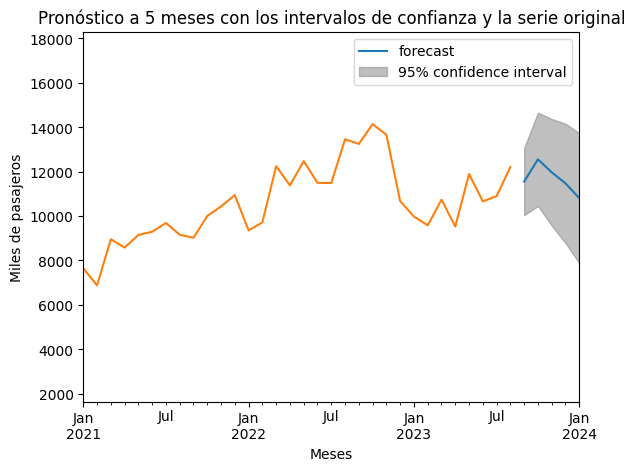

In [113]:
plot_predict(results,'2023-09-01','2024-01-01')
metro['miles de pasajeros'].plot()
plt.title('Pronóstico a 5 meses con los intervalos de confianza y la serie original')
plt.xlabel('Meses')
plt.ylabel('Miles de pasajeros')
plt.xlim('2021-01-01', pronostico_5meses.index[-1])
plt.show();

*h) Realiza  el  pronostico  a  5  meses  con  los  intervalos  de  confianza*

In [114]:
forecast = results.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [115]:
inicio='2023-08-01'
fin='2024-01-01'

In [116]:
pronostico_valor=forecast_mean[inicio:fin]
pronostico_intervalos=forecast_ci.loc[inicio:fin]

In [117]:
df_pronostico=pd.DataFrame({'pronostico':pronostico_valor,
                            'limite inf':pronostico_intervalos.iloc[:,0],
                            'limite_sup':pronostico_intervalos.iloc[:,1]
})

In [118]:
df_pronostico

,pronostico,limite inf,limite_sup
2023-09-01,11550.767744,10036.862482,13064.673007
2023-10-01,12552.862921,10452.326416,14653.399426
2023-11-01,11966.538314,9565.883914,14367.192713
2023-12-01,11468.971711,8781.119154,14156.824267
2024-01-01,10801.939327,7872.642940,13731.235713


*i) Calcula los ingresos y el intervalo de los ingreso multiplicando por $7.1*

In [119]:
ingresos1=df_pronostico*7.1

In [120]:
print('Los ingresos estimados de los siguientes 5 meses son:\n',ingresos1)

Los ingresos estimados de los siguientes 5 meses son:
               pronostico    limite inf     limite_sup
2023-09-01  82010.450985  71261.723622   92759.178348
2023-10-01  89125.326740  74211.517555  104039.135924
2023-11-01  84962.422026  67917.775790  102007.068263
2023-12-01  81429.699148  62345.945997  100513.452299
2024-01-01  76693.769219  55895.764872   97491.773565
